## ASTR777 Star and Planet Formation Problem Set 4
### Monte-Carlo sampling from an IMF

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

### IMF prescription from Chabrier 2003 PASP Table 1
\begin{align}
\xi(\log m) &\equiv \frac{dN}{d\log m} = A \exp[-(\log m - \log m_c)^2/2\sigma^2],~~~~ m \leq 1\,M_\odot\\
\xi(\log m) &= A m^{-x},~~~~ m > 1\,M_\odot
\end{align}

In [2]:
A1 = 0.158
mc = 0.079
sigma = 0.69
A2 = 0.0443
x = 1.3

In [3]:
npts = 1000
m = np.logspace(-2,2,npts)
xi = np.zeros(npts)
i1 = m < 1
xi[i1] = A1*np.exp(-(np.log10(m[i1])-np.log10(mc))**2/(2*sigma**2))
xi[~i1] = A2*m[~i1]**(-x)

Text(0, 0.5, '$\\xi(\\log m)$')

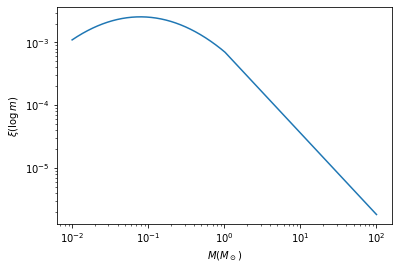

In [4]:
# plot the normalized IMF
xi /= np.sum(xi)
plt.plot(m,xi)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$M (M_\odot)$')
plt.ylabel(r'$\xi(\log m)$')

Text(0, 0.5, '$\\Sigma\\xi(\\log M)$')

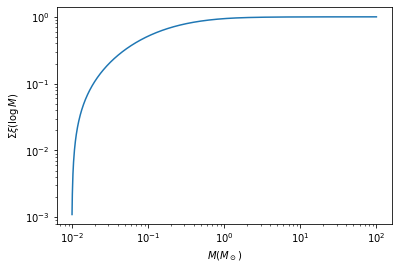

In [5]:
# cumulative distribution
cxi = np.cumsum(xi)
plt.plot(m, cxi)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$M (M_\odot)$')
plt.ylabel(r'$\Sigma\xi(\log M)$')

In [6]:
# normalize cumulative sum to make it a probability between 0 and 1
p = (cxi - cxi[0]) / (cxi[-1] - cxi[0])

In [7]:
# draw N random numbers from a uniform distribution between 0 and 1
Nsample = 10000
Msample = np.zeros(Nsample)
for i in range(Nsample):
    u = np.random.uniform()
    j = np.argmin(np.abs(u-p))
    Msample[i] = m[j]

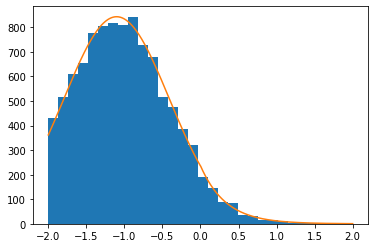

In [8]:
# check that it works
# with a crude normalization to the peak (should really be an integral)
Nbins = 30
Nhist, bin_edges, patches = plt.hist(np.log10(Msample), Nbins)
plt.plot(np.log10(m), xi * np.max(Nhist) / np.max(xi))

### compare two different IMFs

In [10]:
# function to output a Chabrier IMF with user-defined slope beyond 1 Msun
def imf(Gamma):
    A1 = 0.158
    mc = 0.079
    sigma = 0.69
    A2 = 0.0443
    m = np.logspace(-2,2,1000)
    xi = np.zeros(1000)
    i1 = m < 1
    xi[i1] = A1*np.exp(-(np.log10(m[i1])-np.log10(mc))**2/(2*sigma**2))
    xi[~i1] = A2*m[~i1]**(-Gamma)
    xi /= np.sum(xi)
    
    return m, xi

In [11]:
# randomly draw N stars with mass > Mmin from an IMF with slope Gamma
def imf_sample(N, Mmin, Gamma):
    m_imf, xi = imf(Gamma)
    cxi = np.cumsum(xi)
    p = (cxi - cxi[0]) / (cxi[-1] - cxi[0])
    M = np.zeros(N)
    i = 0
    while i < N:
        u = np.random.uniform()
        j = np.argmin(np.abs(u-p))
        if m_imf[j] > Mmin:
            M[i] = m_imf[j]
            i += 1

    return M

In [88]:
# plot and compare two different IMFs for a given sample size with a given lower mass cutoff

N = 100
M_min = 1
Gamma1 = 1.35
Gamma2 = 2

M1 = imf_sample(N, M_min, Gamma1)
M2 = imf_sample(N, M_min, Gamma2)
KS = stats.kstest(M1, M2)
print(f'KS probability that the two samples are the same = {KS.pvalue:5.3f}')

KS probability that the two samples are the same = 0.054


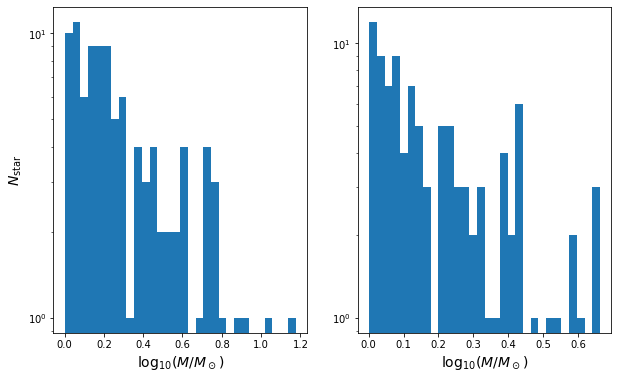

In [89]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(121)
#ax1.set_xlim(-2, 2)
#ax1.set_ylim(0.7, N/10)
ax1.set_yscale('log')
ax1.set_xlabel(r'$\log_{10} (M/M_\odot)$', fontsize=14)
ax1.set_ylabel(r'$N_{\rm star}$', fontsize=14)

ax2 = fig.add_subplot(122)
#ax2.set_xlim(-2, 2)
#ax2.set_ylim(0.7, N/10)
ax2.set_yscale('log')
ax2.set_xlabel(r'$\log_{10} (M/M_\odot)$', fontsize=14)
#ax2.set_ylabel(r'$N_{\rm star}$', fontsize=14)

Nbins = 30
Nhist1, bin_edges, patches = ax1.hist(np.log10(M1), Nbins)
Nhist1, bin_edges, patches = ax2.hist(np.log10(M2), Nbins)

### Answer to question 3:
### N ~ 250 stars to show x=1 differs from x=1.35 with Mmin = 1 Msun
### N ~ 100 stars to show x=2 differs from x=1.35 with Mmin = 0.5 Msun